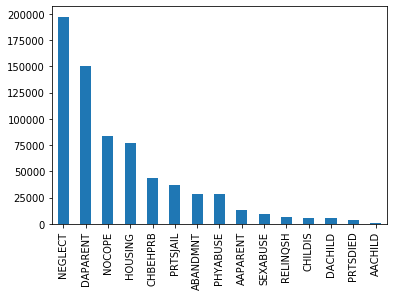

In [3]:
import pandas as pa
import seaborn as sb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
file='../data/filldata_reason.csv'
data = pa.read_csv(file)
data = data.dropna()
data.head()

reasons = set(data['reason'])
data['reason'].value_counts().plot(kind='bar')
data['reason'] = pa.Categorical(data['reason']).codes

xtrain,xtest,ytrain,ytest =  train_test_split(data.drop('reason',axis=1),data['reason'])
ytrain.value_counts()
train = xtrain
train['reason']  = ytrain

size = 407
nt = train[train['reason']==0]

for i in range(1,15):
    t = train[train['reason']==i].sample(n=size)
    nt = pa.concat([nt,t])

nt['reason'].value_counts()
xtrain,ytrain = nt.drop('reason',axis=1),nt['reason']

In [5]:
# ytrain.value_counts().plot(kind='bar')

In [ ]:
# model = XGBClassifier()
# n_estimators = range(100, 500, 100)
# param_grid = dict(n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(xtrain,ytrain)
# grid_result.cv_results_

In [ ]:

from matplotlib import pyplot
means = grid_result.cv_results_['mean_test_score']
pyplot.errorbar(n_estimators, means)

In [35]:
model = XGBClassifier()
max_dep = range(5, 25, 5)
param_grid = dict(max_dep=max_dep)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot
means = grid_result.cv_results_['mean_test_score']
pyplot.errorbar(n_estimators, means)